In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("../data/Coffee Shop Sales.xlsx")

In [3]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [4]:
df[df.duplicated()]

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail


In [5]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

* If two or more transactions happen at the exact same **time**, on the same **day**, in the same **store**, then they are considered part of a bigger transaction that includes different kinds of products.

In [6]:
df['transaction_datetime'] = df.apply(
    lambda row: pd.Timestamp.combine(row['transaction_date'], row['transaction_time']), axis=1
)

In [7]:
df['actual_transaction_id'] = df.groupby(['transaction_datetime', 'store_id']).ngroup()

In [8]:
df['transaction_id'] = df['actual_transaction_id']
df.drop(columns=['actual_transaction_id'], inplace=True)

In [9]:
df.head(6)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_datetime
0,0,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:06:11
1,1,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:08:56
2,2,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:14:04
3,3,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:20:24
4,4,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:22:41
5,4,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.0,Bakery,Scone,Oatmeal Scone,2023-01-01 07:22:41


In [10]:
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Noon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['transaction_datetime'].dt.hour.apply(get_time_of_day)

In [11]:
df['time_of_day'].value_counts()

time_of_day
Morning    81751
Noon       35334
Evening    31428
Night        603
Name: count, dtype: int64

In [12]:
df['transaction_id'].nunique()

116790

In [13]:
df.shape

(149116, 13)

In [14]:
df['transaction_id'].value_counts()

transaction_id
69814    7
96642    7
42156    6
96779    6
3750     6
        ..
44510    1
44509    1
44508    1
44507    1
58395    1
Name: count, Length: 116790, dtype: int64

In [15]:
df['store_location'].value_counts()

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

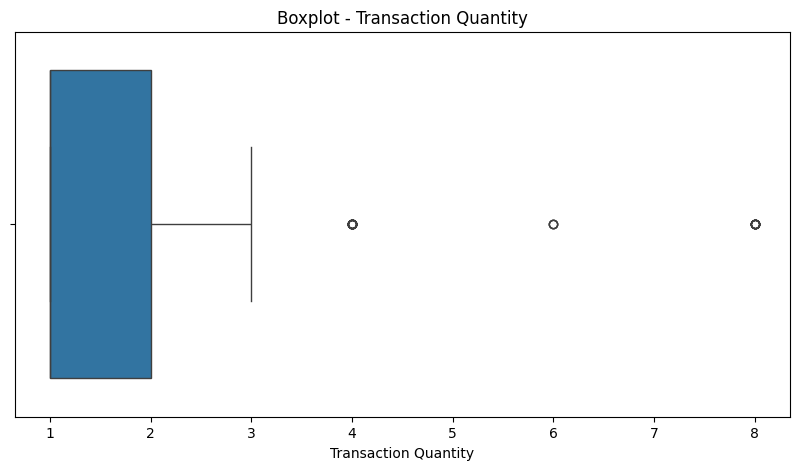

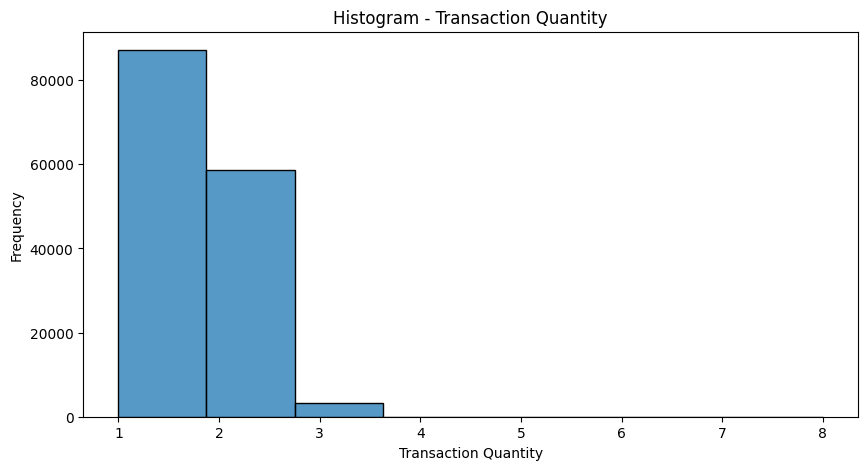

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['transaction_qty'])
plt.title('Boxplot - Transaction Quantity')
plt.xlabel('Transaction Quantity')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['transaction_qty'],  bins=8)
plt.title('Histogram - Transaction Quantity')
plt.xlabel('Transaction Quantity')
plt.ylabel('Frequency')
plt.show()

In [17]:
df[df['transaction_qty']>4].head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_datetime,time_of_day
9310,7315,2023-01-17,09:05:20,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,2023-01-17 09:05:20,Morning
9365,7356,2023-01-17,09:55:47,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,2023-01-17 09:55:47,Morning
39176,30948,2023-03-09,09:04:04,6,5,Lower Manhattan,82,12.0,Branded,Housewares,I Need My Bean! Diner mug,2023-03-09 09:04:04,Morning
61622,48545,2023-04-09,09:04:04,6,5,Lower Manhattan,82,12.0,Branded,Housewares,I Need My Bean! Diner mug,2023-04-09 09:04:04,Morning
68806,53853,2023-04-17,09:55:47,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,2023-04-17 09:55:47,Morning


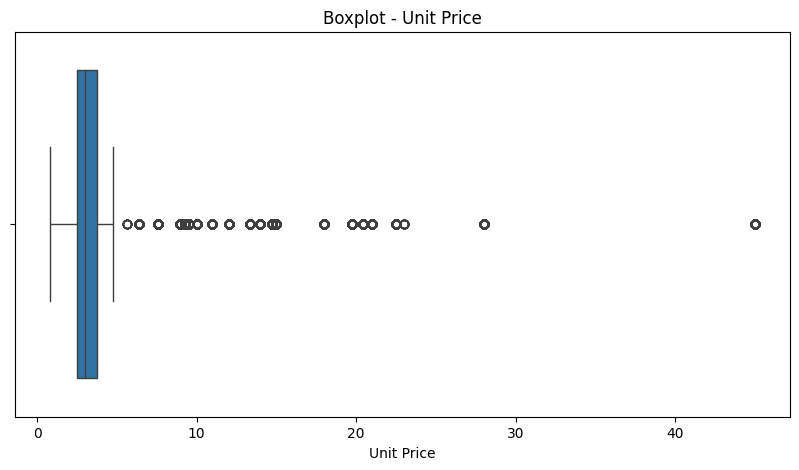

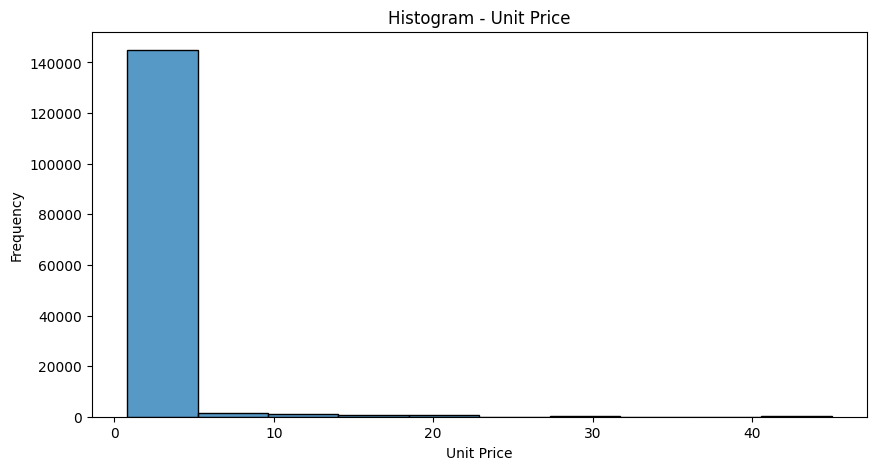

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['unit_price'])
plt.title('Boxplot - Unit Price')
plt.xlabel('Unit Price')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['unit_price'], bins=10)
plt.title('Histogram - Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

In [19]:
df[df['unit_price']>10]['unit_price'].value_counts()

unit_price
18.00    392
14.00    293
28.00    233
12.00    224
21.00    218
45.00    190
22.50    177
14.75    169
20.45    150
13.33    148
15.00    148
19.75    146
10.95    122
23.00     26
Name: count, dtype: int64

In [20]:
df[df['unit_price']>30].head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_datetime,time_of_day
5182,4274,2023-01-10,09:20:43,1,5,Lower Manhattan,8,45.0,Coffee beans,Premium Beans,Civet Cat,2023-01-10 09:20:43,Morning
5874,4791,2023-01-11,11:24:31,1,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,2023-01-11 11:24:31,Morning
5939,4843,2023-01-11,13:53:09,1,5,Lower Manhattan,8,45.0,Coffee beans,Premium Beans,Civet Cat,2023-01-11 13:53:09,Noon
7616,6070,2023-01-14,10:57:38,1,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,2023-01-14 10:57:38,Morning
8443,6668,2023-01-15,18:18:51,1,3,Astoria,8,45.0,Coffee beans,Premium Beans,Civet Cat,2023-01-15 18:18:51,Evening


In [21]:
df[df['unit_price']==28].head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_datetime,time_of_day
3296,2832,2023-01-07,07:45:15,1,5,Lower Manhattan,9,28.0,Coffee beans,Organic Beans,Organic Decaf Blend,2023-01-07 07:45:15,Morning
3302,2836,2023-01-07,07:50:42,1,5,Lower Manhattan,9,28.0,Coffee beans,Organic Beans,Organic Decaf Blend,2023-01-07 07:50:42,Morning
3408,2918,2023-01-07,09:05:19,1,5,Lower Manhattan,9,28.0,Coffee beans,Organic Beans,Organic Decaf Blend,2023-01-07 09:05:19,Morning
4598,3841,2023-01-09,09:42:16,1,5,Lower Manhattan,81,28.0,Branded,Clothing,I Need My Bean! T-shirt,2023-01-09 09:42:16,Morning
5596,4584,2023-01-11,07:20:48,1,8,Hell's Kitchen,81,28.0,Branded,Clothing,I Need My Bean! T-shirt,2023-01-11 07:20:48,Morning


In [22]:
df['month_name'] = df['transaction_date'].dt.month_name()

In [23]:
df['day_name'] = df['transaction_date'].dt.day_name()

In [24]:
df['isWeekend'] = df['day_name'].isin(['Saturday', 'Sunday'])

In [25]:
df['day_name'].value_counts()

day_name
Friday       21701
Thursday     21654
Monday       21643
Wednesday    21310
Tuesday      21202
Sunday       21096
Saturday     20510
Name: count, dtype: int64

In [26]:
unique_transactions_per_day = df.drop_duplicates(subset=['transaction_id']).groupby('day_name').size()
unique_transactions_per_day

day_name
Friday       16959
Monday       17030
Saturday     15980
Sunday       16554
Thursday     17119
Tuesday      16476
Wednesday    16672
dtype: int64

In [27]:
df['day'] = df['transaction_datetime'].dt.day
df['month'] = df['transaction_datetime'].dt.month
df['year'] = df['transaction_datetime'].dt.year

df['hour'] = df['transaction_datetime'].dt.hour
df['minutes'] = df['transaction_datetime'].dt.minute
df['seconds'] = df['transaction_datetime'].dt.second

In [28]:
coordinates = {
    'Hell\'s Kitchen': {'latitude': 40.76417, 'longitude': -73.99222},
    'Astoria': {'latitude': 40.764357, 'longitude': -73.923462},
    'Lower Manhattan': {'latitude': 40.7128, 'longitude': -74.0060}
}

def get_latitude(location):
    return coordinates.get(location, {}).get('latitude', None)

def get_longitude(location):
    return coordinates.get(location, {}).get('longitude', None)

df['latitude'] = df['store_location'].apply(get_latitude)
df['longitude'] = df['store_location'].apply(get_longitude)

In [29]:
df.head(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,...,day_name,isWeekend,day,month,year,hour,minutes,seconds,latitude,longitude
0,0,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,...,Sunday,True,1,1,2023,7,6,11,40.7128,-74.006
1,1,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,...,Sunday,True,1,1,2023,7,8,56,40.7128,-74.006
2,2,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,...,Sunday,True,1,1,2023,7,14,4,40.7128,-74.006
3,3,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,...,Sunday,True,1,1,2023,7,20,24,40.7128,-74.006
4,4,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,...,Sunday,True,1,1,2023,7,22,41,40.7128,-74.006
5,4,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,...,Sunday,True,1,1,2023,7,22,41,40.7128,-74.006
6,5,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,...,Sunday,True,1,1,2023,7,25,49,40.7128,-74.006
7,6,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,...,Sunday,True,1,1,2023,7,33,34,40.7128,-74.006
8,7,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,...,Sunday,True,1,1,2023,7,39,13,40.7128,-74.006
9,8,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,...,Sunday,True,1,1,2023,7,39,34,40.7128,-74.006


In [30]:
df = df.reset_index()
df

,index,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,...,day_name,isWeekend,day,month,year,hour,minutes,seconds,latitude,longitude
0,0,0,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,...,Sunday,True,1,1,2023,7,6,11,40.71280,-74.00600
1,1,1,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,...,Sunday,True,1,1,2023,7,8,56,40.71280,-74.00600
2,2,2,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,...,Sunday,True,1,1,2023,7,14,4,40.71280,-74.00600
3,3,3,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,...,Sunday,True,1,1,2023,7,20,24,40.71280,-74.00600
4,4,4,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,...,Sunday,True,1,1,2023,7,22,41,40.71280,-74.00600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149111,116786,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,...,Friday,False,30,6,2023,20,18,41,40.76417,-73.99222
149112,149112,116787,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,...,Friday,False,30,6,2023,20,25,10,40.76417,-73.99222
149113,149113,116788,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,...,Friday,False,30,6,2023,20,31,34,40.76417,-73.99222
149114,149114,116789,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,...,Friday,False,30,6,2023,20,57,19,40.76417,-73.99222


In [31]:
df = df.drop(columns=['transaction_datetime'])

In [32]:
df.columns

Index(['index', 'transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail',
       'time_of_day', 'month_name', 'day_name', 'isWeekend', 'day', 'month',
       'year', 'hour', 'minutes', 'seconds', 'latitude', 'longitude'],
      dtype='object')

In [33]:
df['total_amount'] = df['transaction_qty'] * df['unit_price']

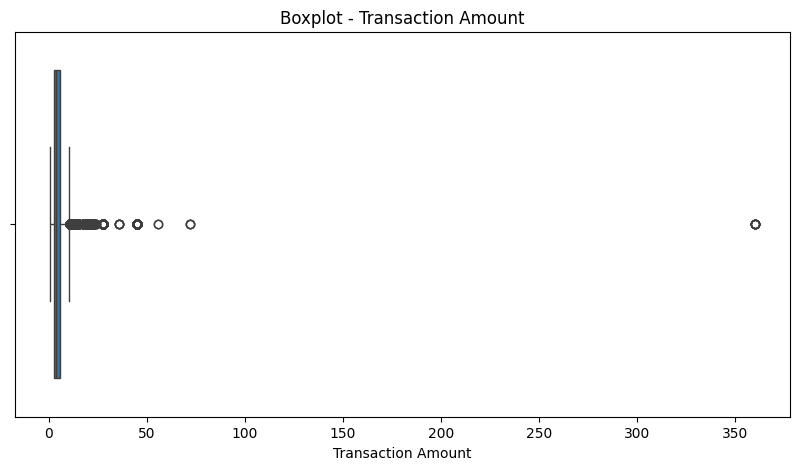

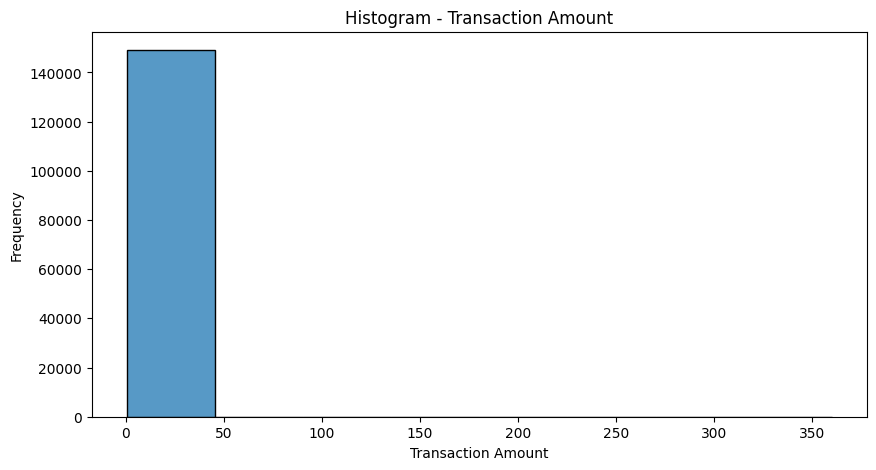

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['total_amount'])
plt.title('Boxplot - Transaction Αmount')
plt.xlabel('Transaction Αmount')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['total_amount'],  bins=8)
plt.title('Histogram - Transaction Αmount')
plt.xlabel('Transaction Αmount')
plt.ylabel('Frequency')
plt.show()

In [35]:
df[df['total_amount']>350]

,index,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,...,isWeekend,day,month,year,hour,minutes,seconds,latitude,longitude,total_amount
9310,9310,7315,2023-01-17,09:05:20,8,8,Hell's Kitchen,8,45.0,Coffee beans,...,False,17,1,2023,9,5,20,40.76417,-73.99222,360.0
9365,9365,7356,2023-01-17,09:55:47,8,8,Hell's Kitchen,8,45.0,Coffee beans,...,False,17,1,2023,9,55,47,40.76417,-73.99222,360.0
68806,68806,53853,2023-04-17,09:55:47,8,8,Hell's Kitchen,8,45.0,Coffee beans,...,False,17,4,2023,9,55,47,40.76417,-73.99222,360.0
68981,68981,53963,2023-04-17,11:18:31,8,8,Hell's Kitchen,8,45.0,Coffee beans,...,False,17,4,2023,11,18,31,40.76417,-73.99222,360.0
97979,97979,76685,2023-05-17,09:05:20,8,8,Hell's Kitchen,8,45.0,Coffee beans,...,False,17,5,2023,9,5,20,40.76417,-73.99222,360.0
98275,98275,76886,2023-05-17,11:18:31,8,8,Hell's Kitchen,8,45.0,Coffee beans,...,False,17,5,2023,11,18,31,40.76417,-73.99222,360.0
133186,133186,104251,2023-06-17,09:55:47,8,8,Hell's Kitchen,8,45.0,Coffee beans,...,True,17,6,2023,9,55,47,40.76417,-73.99222,360.0
133337,133337,104348,2023-06-17,10:41:11,8,8,Hell's Kitchen,8,45.0,Coffee beans,...,True,17,6,2023,10,41,11,40.76417,-73.99222,360.0
133407,133407,104396,2023-06-17,11:18:31,8,8,Hell's Kitchen,8,45.0,Coffee beans,...,True,17,6,2023,11,18,31,40.76417,-73.99222,360.0
148702,148702,116465,2023-06-30,11:18:31,8,8,Hell's Kitchen,8,45.0,Coffee beans,...,False,30,6,2023,11,18,31,40.76417,-73.99222,360.0


In [36]:
stores_income = df.groupby('store_id').agg(
    amount = ('total_amount', 'sum')
).reset_index()

stores_income

,store_id,amount
0,3,232243.91
1,5,230057.25
2,8,236511.17


In [37]:
products_income = df.groupby('product_type').agg(
    amount = ('total_amount', 'sum')
).reset_index()

products_income

,product_type,amount
0,Barista Espresso,91406.20
1,Biscotti,19793.53
2,Black tea,2711.85
3,Brewed Black tea,47932.00
4,Brewed Chai tea,77081.95
5,Brewed Green tea,23852.50
6,Brewed herbal tea,47539.50
7,Chai tea,4301.25
8,Clothing,6163.00
9,Drinking Chocolate,2728.04


In [38]:
df['total_amount'].sum(axis=0)

698812.3300000002

In [39]:
transactions_per_store = df.groupby('store_id').agg(
    unique_transactions = ('transaction_id', 'nunique')
).reset_index()

transactions_per_store

,store_id,unique_transactions
0,3,40684
1,5,35652
2,8,40454


In [40]:
df[df['index']==3824]

,index,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,...,isWeekend,day,month,year,hour,minutes,seconds,latitude,longitude,total_amount
3824,3824,3252,2023-01-08,07:12:48,2,8,Hell's Kitchen,63,0.8,Flavours,...,True,8,1,2023,7,12,48,40.76417,-73.99222,1.6


In [41]:
df.to_csv('data/Cleaned Coffee Shop Sales.csv', index=False)